The permutation test is a statistical test that involves rerunning the study many times and recalculating the test statistic for each iteration. The goal is to calculate a distribution of the test statistics over these many iterations. This distribution is called the sampling distribution and it approximates the full range of possible test statistics under the null hypothesis. We can then benchmark the test statistic we observed in the data (a mean difference of 2.52) to determine how likely it is to observe this mean difference under the null hypothesis. If the null hypothesis is true, that the weight loss pill doesn't help people lose more weight, then the observed mean difference of 2.52 should be quite common in the sampling distribution. If it's instead extremely rare, then we should reject the null hypothesis instead.
To simulate rerunning the study, we randomly reassign each data point (weight lost) to either group A or group B. We keep track of the recalculated test statistics as a separate list. By re-randomizing the groups that the weight loss values belong to, we're simulating what randomly generated groupings of these weight loss values would look like. We then use these randomly generated groupings to understand how rare the groupings in our actual data were.

Ideally, the number of times we re-randomize the groups that each data point belongs to matches the total number of possible permutations. Usually, the number of total permutations is too high for even powerful supercomputers to calculate within a reasonable time frame. While we'll use 1000 iterations for now, in later lessons we'll learn how to quantify the tradeoff we make between accuracy and speed to determine the optimal number of iterations.



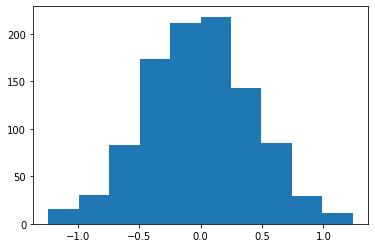

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random

weights = pd.read_csv('weight_loss.csv', header = None, names = ['Group_A', 'Group_B'])
group_a = weights['Group_A'].tolist() 
group_b = weights['Group_B'].tolist() 

all_values = group_a + group_b


mean_differences = []

for i in range(1000):
    shuffled_list = random.sample(all_values,100)
    group_a = shuffled_list[:50]
    group_b = shuffled_list[50:]
    iteration_mean_difference = np.mean(group_b) - np.mean(group_a)
    mean_differences.append(iteration_mean_difference)
    
plt.hist(mean_differences)
plt.show()

By randomly assigning participants to group A or group B, we account for the effect of random chance. 
Someone in group B who just happened to lose more weight (but not because of the pills) makes the results look better than they were. 
By creating many permutations, we're able to see all possible configurations of this error. 
Creating a histogram enables us to see how likely different values of our test statistic are if we repeated our experiment many times.

we need to count how frequently each value in the list, mean_differences, occurs

In [12]:
sampling_distribution = {}
for stat in mean_differences:
    if sampling_distribution.get(stat, False):
        sampling_distribution[stat] += 1
    else:
        sampling_distribution[stat] = 1
        

In the sampling distribution we generated, most of the values are closely centered around the mean difference of 0. This means that if it were purely up to chance, both groups would have lost the same amount of weight (the null hypothesis). But since the observed test statistic is not near 0, it could mean that the weight loss pills could be responsible for the mean difference in the study.

We can now use the sampling distribution to determine the number of times a value of 2.52 or higher appeared in our simulations. If we divide that frequency by 1000, we'll have the probability of observing a mean difference of 2.52 or higher purely due to random chance.

This probability is called the p value. If this value is high, it means that the difference in the amount of weight both groups lost could have easily happened randomly and the weight loss pills probably didn't play a role. On the other hand, a low p value implies that there's an incredibly small probability that the mean difference we observed was because of random chance.

In general, it's good practice to set the p value threshold before conducting the study:

If the p value is less than the threshold, we:

reject the null hypothesis that there's no difference in the mean amount of weight lost by participants in both groups; and
conclude that there is some evidence that the weight loss pill does affect the amount of weight people lost.

If the p value is greater than the threshold, we:
fail to reject the null hypothesis that there's no difference in the mean amount of weight lost by participants in both groups,
conclude that the weight loss pill doesn't seem to be effective in helping people lose weight.

The most common p value threshold is 0.05 or 5%, which is what we'll use in this lesson. 

In [13]:
frequencies = []
for key,value in sampling_distribution.items():
    if key >= 2.52:
        frequencies.append(value)
p_value = np.sum(frequencies)/1000
p_value

#Since the p value of 0 is less than the threshold we set of 0.05, we conclude that the difference in weight lost can't be attributed to random chance alone. We therefore reject the null hypothesis

0.0

The p value threshold you set can also affect the conclusion you reach.
If you set too high of a p value threshold, you may reject the null hypothesis incorrectly. This is known as a type I error.
If you set too low of a p value threshold, you may fail to reject the null hypothesis incorrectly. This is known as a type II error.